In [26]:
import numpy  as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df=pd.read_csv("housing.csv")
df.reset_index()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...,...
20635,20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [28]:

df.info

<bound method DataFrame.info of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  

In [29]:
df.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [30]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

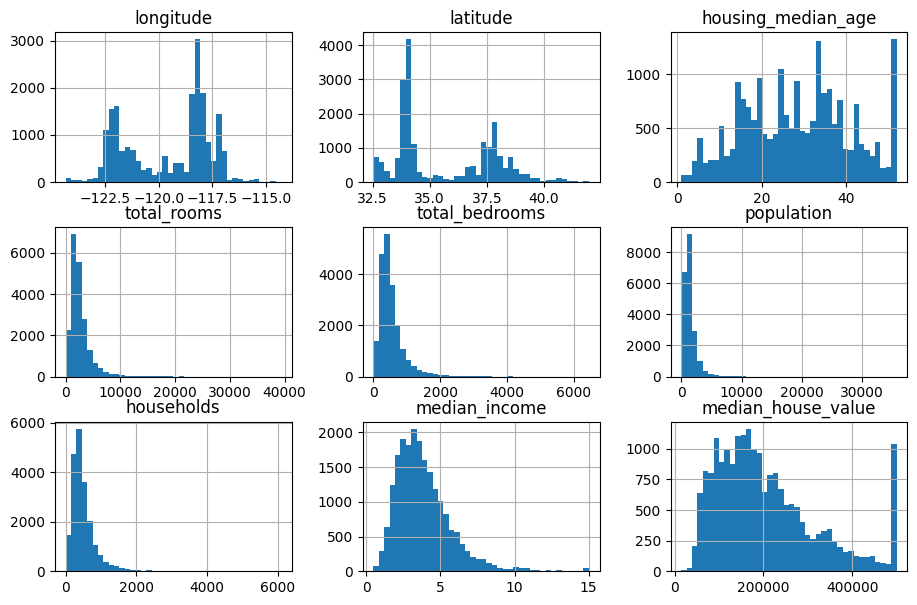

In [31]:
df.hist(bins=40 , figsize=(11,7))

# Test set

In [32]:
def shuffle_and_split_df(df,testratio):
    np.random.seed(40)    # تکرار پذیر میکنه رندوم رو 
    random_indices=np.random.permutation(len(df))
    test_set_size=int(len(df)* testratio)
    test_random_indices=random_indices[:test_set_size]
    train_random_indices=random_indices[test_set_size:]
    return df.iloc[test_random_indices]  , df.iloc[train_random_indices]

In [33]:
train_set , test_set=shuffle_and_split_df(df , 0.2)

In [34]:
test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
9226,-120.04,36.93,11.0,3606.0,699.0,2074.0,644.0,2.6941,63300.0,INLAND
11826,-121.04,39.00,21.0,4059.0,730.0,1874.0,693.0,4.8051,174300.0,INLAND
4553,-118.24,34.06,33.0,390.0,199.0,435.0,193.0,1.1979,350000.0,<1H OCEAN
10787,-117.92,33.64,25.0,2224.0,580.0,985.0,516.0,3.1305,268800.0,<1H OCEAN
4104,-118.35,34.13,39.0,1610.0,278.0,511.0,278.0,4.3333,385900.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
11532,-118.09,33.77,26.0,5359.0,1508.0,1829.0,1393.0,1.7675,61300.0,<1H OCEAN
16065,-122.48,37.75,49.0,2203.0,407.0,1052.0,405.0,4.4375,329200.0,NEAR BAY
14501,-117.23,32.86,16.0,1200.0,468.0,648.0,443.0,3.0450,100000.0,NEAR OCEAN
14555,-117.13,32.96,15.0,2267.0,292.0,1180.0,289.0,6.7120,240200.0,<1H OCEAN


In [35]:
from zlib import crc32

In [36]:
crc32(np.int64(10))

4108501921

In [37]:
def is_identifier_in_test_set(identifier , testratio):
    return crc32(np.int64(identifier))  < testratio*2**32

In [38]:
def split_train_test_with_idenrifier_hash(df, testratio ,identifier_column):
    identifiers=df[identifier_column]
    in_test_set=identifiers.apply(lambda id_:is_identifier_in_test_set(id_ , testratio))
    return df.loc[~in_test_set] , df.loc[in_test_set]

In [39]:
train_set, test_set = split_train_test_with_idenrifier_hash(df.reset_index() , 0.2, "index")

# train & test split in sklearn

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
train_set, test_set= train_test_split(df, test_size=0.2 , random_state=40)

In [42]:
train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
9226,-120.04,36.93,11.0,3606.0,699.0,2074.0,644.0,2.6941,63300.0,INLAND
11826,-121.04,39.00,21.0,4059.0,730.0,1874.0,693.0,4.8051,174300.0,INLAND
4553,-118.24,34.06,33.0,390.0,199.0,435.0,193.0,1.1979,350000.0,<1H OCEAN
10787,-117.92,33.64,25.0,2224.0,580.0,985.0,516.0,3.1305,268800.0,<1H OCEAN
4104,-118.35,34.13,39.0,1610.0,278.0,511.0,278.0,4.3333,385900.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
11532,-118.09,33.77,26.0,5359.0,1508.0,1829.0,1393.0,1.7675,61300.0,<1H OCEAN
16065,-122.48,37.75,49.0,2203.0,407.0,1052.0,405.0,4.4375,329200.0,NEAR BAY
14501,-117.23,32.86,16.0,1200.0,468.0,648.0,443.0,3.0450,100000.0,NEAR OCEAN
14555,-117.13,32.96,15.0,2267.0,292.0,1180.0,289.0,6.7120,240200.0,<1H OCEAN


In [43]:
test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
6607,-118.14,34.18,47.0,3457.0,622.0,1700.0,579.0,3.5164,226500.0,<1H OCEAN
884,-121.97,37.54,31.0,1949.0,344.0,986.0,322.0,4.6349,196200.0,<1H OCEAN
9457,-123.84,39.83,19.0,1461.0,340.0,515.0,227.0,1.5278,145800.0,NEAR OCEAN
18681,-121.82,36.86,17.0,1573.0,272.0,142.0,55.0,2.1719,420000.0,NEAR OCEAN
4654,-118.33,34.05,48.0,2405.0,527.0,1868.0,502.0,3.3750,257800.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
19314,-122.87,38.43,36.0,1987.0,387.0,1065.0,347.0,4.0446,172200.0,<1H OCEAN
15433,-117.25,33.20,10.0,2050.0,473.0,1302.0,471.0,2.7961,131300.0,<1H OCEAN
3631,-118.43,34.23,35.0,2049.0,390.0,1286.0,385.0,4.4432,181500.0,<1H OCEAN
3689,-118.36,34.23,15.0,2485.0,742.0,1994.0,670.0,2.8333,183200.0,<1H OCEAN


In [44]:
df["median_incom_categories"]=pd.cut(df["median_income"] ,bins=[0.0,1.5, 3.0, 4.5,6.0, np.inf],
        labels=[1,2,3,4,5 ])

df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,median_incom_categories
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,2
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,2
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,2
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,2


In [45]:
df["median_income"]

0        8.3252
1        8.3014
2        7.2574
3        5.6431
4        3.8462
          ...  
20635    1.5603
20636    2.5568
20637    1.7000
20638    1.8672
20639    2.3886
Name: median_income, Length: 20640, dtype: float64

<Axes: xlabel='median_incom_categories'>

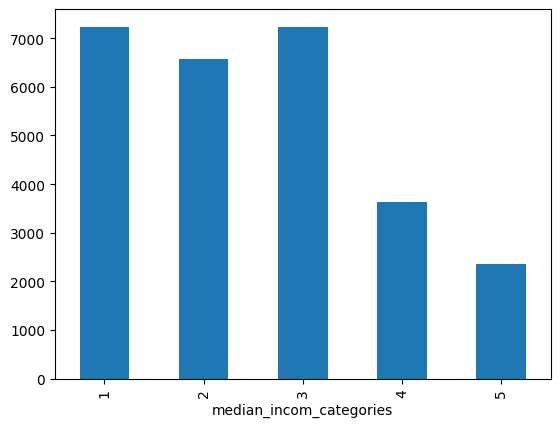

In [46]:
df["median_incom_categories"].value_counts().plot.bar()
df["median_incom_categories"].value_counts().sort_index().plot.bar()

In [47]:
from sklearn.model_selection import StratifiedShuffleSplit
sss=StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=40)
stratified_split=[]
for train_i, test_i in sss.split(df, df["median_incom_categories"]):
    stratified_train_set_n=df.iloc[train_i]
    stratified_test_set_n=df.iloc[test_i]
    stratified_split.append([stratified_train_set_n, stratified_test_set_n])

In [48]:
stratified_split
stratified_split[0 ]

[       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
 16415    -121.26     37.88                42.0        465.0            93.0   
 1279     -121.64     37.85                22.0       1999.0           415.0   
 7741     -118.15     33.95                35.0       2753.0           702.0   
 4425     -118.24     34.07                27.0        223.0            80.0   
 1283     -121.82     38.02                46.0        176.0            43.0   
 ...          ...       ...                 ...          ...             ...   
 1221     -120.65     38.28                21.0       3095.0           681.0   
 12640    -121.45     38.53                34.0       1893.0           415.0   
 5747     -118.27     34.17                48.0       1560.0           280.0   
 16224    -121.33     37.98                36.0       3113.0           576.0   
 8967     -118.40     34.00                37.0       1534.0           258.0   
 
        population  households  median

In [49]:
str_train_set, str_test_set= train_test_split(df, test_size=0.2 , random_state=40, stratify=df["median_incom_categories"])

In [50]:
str_train_set=[["median_incom_categories"]].value_counts()/len(str_train_set)

AttributeError: 'list' object has no attribute 'value_counts'

In [ ]:
str_train_set=str_train_set.drop("median_incom_categories", axis=1)
str_test_set=str_test_set.drop("median_incom_categories", axis=1)

# visualize

In [51]:
train=str_train_set
train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,median_incom_categories
16415,-121.26,37.88,42.0,465.0,93.0,256.0,93.0,3.1719,158300.0,INLAND,3
1279,-121.64,37.85,22.0,1999.0,415.0,967.0,320.0,4.4583,253900.0,INLAND,3
7741,-118.15,33.95,35.0,2753.0,702.0,1592.0,614.0,2.7875,209000.0,<1H OCEAN,2
4425,-118.24,34.07,27.0,223.0,80.0,249.0,82.0,1.6136,137500.0,<1H OCEAN,2
1283,-121.82,38.02,46.0,176.0,43.0,101.0,40.0,2.2361,93800.0,INLAND,2
...,...,...,...,...,...,...,...,...,...,...,...
1221,-120.65,38.28,21.0,3095.0,681.0,1341.0,546.0,2.1382,104000.0,INLAND,2
12640,-121.45,38.53,34.0,1893.0,415.0,884.0,395.0,2.1679,75400.0,INLAND,2
5747,-118.27,34.17,48.0,1560.0,280.0,825.0,269.0,5.5118,354700.0,<1H OCEAN,4
16224,-121.33,37.98,36.0,3113.0,576.0,1746.0,544.0,3.4625,84600.0,INLAND,3


<Axes: xlabel='longitude', ylabel='latitude'>

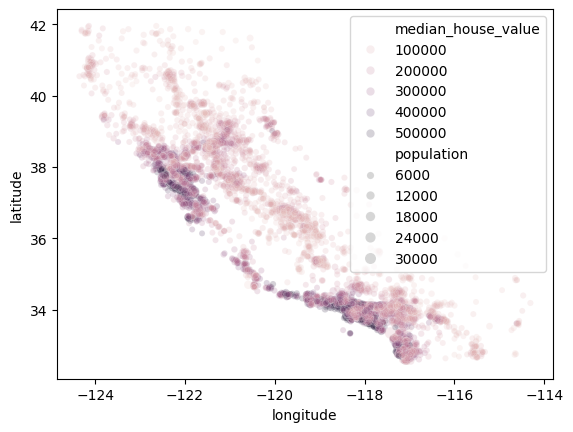

In [52]:
sns.scatterplot(data=train, 
                x="longitude" ,
                y="latitude", 
                size="population", 
                alpha=0.2 , 
                hue="median_house_value")

In [53]:
train.corr()["median_house_value"]

ValueError: could not convert string to float: 'INLAND'

In [ ]:
sns.scatterplot(data=train, x="median_incom",y="median_house_value", )

# Atrribute combinations

In [ ]:
train["rooms_per_house"] = train["total_rooms"] /train["households"]
train["bedrooms_ratio"]= train["total_bedrooms"] / train["total_rooms"]
train["people_per_house"]= train["population"] / train["households"]

train

In [ ]:
train.corr()["median_house_value"]

# Prepare data  
آماده سازی دیتا 

In [90]:
train_features=train.drop("median_house_value" , axis=1)
train_target=train["median_house_value"]
train_target

16415    158300.0
1279     253900.0
7741     209000.0
4425     137500.0
1283      93800.0
           ...   
1221     104000.0
12640     75400.0
5747     354700.0
16224     84600.0
8967     336000.0
Name: median_house_value, Length: 16512, dtype: float64

## Data cleaning

باید ببینمیم کجا میسینگ ولیو داریم

In [91]:
train_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 16415 to 8967
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   longitude                16512 non-null  float64 
 1   latitude                 16512 non-null  float64 
 2   housing_median_age       16512 non-null  float64 
 3   total_rooms              16512 non-null  float64 
 4   total_bedrooms           16344 non-null  float64 
 5   population               16512 non-null  float64 
 6   households               16512 non-null  float64 
 7   median_income            16512 non-null  float64 
 8   ocean_proximity          16512 non-null  object  
 9   median_incom_categories  16512 non-null  category
dtypes: category(1), float64(8), object(1)
memory usage: 1.3+ MB


In [92]:
# remove rows with NA values
train_features.dropna(subset=["total_bedrooms"]).info()

<class 'pandas.core.frame.DataFrame'>
Index: 16344 entries, 16415 to 8967
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   longitude                16344 non-null  float64 
 1   latitude                 16344 non-null  float64 
 2   housing_median_age       16344 non-null  float64 
 3   total_rooms              16344 non-null  float64 
 4   total_bedrooms           16344 non-null  float64 
 5   population               16344 non-null  float64 
 6   households               16344 non-null  float64 
 7   median_income            16344 non-null  float64 
 8   ocean_proximity          16344 non-null  object  
 9   median_incom_categories  16344 non-null  category
dtypes: category(1), float64(8), object(1)
memory usage: 1.3+ MB


In [93]:
# train_features_with_imputed_value
total_bedrooms_median=train_features["total_bedrooms"].median()
train_features["total_bedrooms"]=train_features["total_bedrooms"].fillna(total_bedrooms_median)
total_bedrooms_median

np.float64(436.0)

In [94]:
train_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 16415 to 8967
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   longitude                16512 non-null  float64 
 1   latitude                 16512 non-null  float64 
 2   housing_median_age       16512 non-null  float64 
 3   total_rooms              16512 non-null  float64 
 4   total_bedrooms           16512 non-null  float64 
 5   population               16512 non-null  float64 
 6   households               16512 non-null  float64 
 7   median_income            16512 non-null  float64 
 8   ocean_proximity          16512 non-null  object  
 9   median_incom_categories  16512 non-null  category
dtypes: category(1), float64(8), object(1)
memory usage: 1.3+ MB


In [95]:
# sklearn impute    میسینگ ولیو هار و پیدا و جایگزین یا مدیریت میکنیم

In [96]:
from sklearn.impute import SimpleImputer


In [97]:
simple_imputer=SimpleImputer(strategy="median")

In [98]:
# train_features.info()
train_features_numeric= train_features.select_dtypes(include=[np.number])
train_features_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 16415 to 8967
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


In [99]:
simple_imputer.fit(train_features_numeric)

,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False


In [100]:
simple_imputer.statistics_

array([-118.48  ,   34.25  ,   29.    , 2129.    ,  436.    , 1168.    ,
        411.    ,    3.5341])

In [101]:
train_features_numeric.median().value()

AttributeError: 'Series' object has no attribute 'value'

In [102]:
simple_imputer.transform(train_features_numeric).shape

(16512, 8)

In [103]:
pd.DataFrame(simple_imputer.transform(train_features_numeric),
            columns=train_features_numeric.columns,
            index=train_features_numeric.index).info()


# پینهاد اینه که از  imputer استفاده کنیم 

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 16415 to 8967
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


In [104]:
# consistancy  ساختار ثابتی داره 
## estimator  هر ابجکتی که میشه بر اساس یه سری فیچر یه چیزی رو حدس زنه 
## transformer دیتا ست رو از یه حالت به یه حالت دیگه تبدیل میکنه 
## predictors پیش بینی کننده ها   متد  score , ...
## inspection تنظیم ورودی ها 
## composition ساخت پایپ لاین از عملکرد های مختلف
## 

In [105]:
#  categorical features
train_features[["ocean_proximity"]].value_counts()


ocean_proximity
<1H OCEAN          7324
INLAND             5213
NEAR OCEAN         2126
NEAR BAY           1844
ISLAND                5
Name: count, dtype: int64

In [106]:
train_features_categorical=train_features[["ocean_proximity"]]

In [107]:
from sklearn.preprocessing import OrdinalEncoder     # یکی از راه ها برای تبدیل کتگوری به عدد 

In [108]:
oe=OrdinalEncoder()
ocean_proximity_index=oe.fit_transform(train_features_categorical)
ocean_proximity_index

array([[1.],
       [1.],
       [0.],
       ...,
       [0.],
       [1.],
       [0.]], shape=(16512, 1))

In [109]:
oe.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [110]:
from sklearn.preprocessing import OneHotEncoder

In [111]:
ohe=OneHotEncoder()
ocean_proximity_ohe=ohe.fit_transform(train_features_categorical)

In [112]:
ocean_proximity_ohe.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.]], shape=(16512, 5))

In [113]:
train_features_categorical_ohe=pd.DataFrame(ocean_proximity_ohe.toarray(), 
                                            columns=ohe.get_feature_names_out())

In [114]:
from sklearn.preprocessing import MinMaxScaler

In [115]:
mms=MinMaxScaler(feature_range=(-1,1))

In [116]:
mms.fit_transform(train_features_numeric)

array([[-0.38446215,  0.13496281,  0.60784314, ..., -0.98581799,
        -0.97006579, -0.63145336],
       [-0.46015936,  0.12858661, -0.17647059, ..., -0.94596261,
        -0.89539474, -0.45402132],
       [ 0.23505976, -0.70031881,  0.33333333, ..., -0.910928  ,
        -0.79868421, -0.68447332],
       ...,
       [ 0.21115538, -0.65356004,  0.84313725, ..., -0.95392248,
        -0.91217105, -0.30871298],
       [-0.39840637,  0.15621679,  0.37254902, ..., -0.90229547,
        -0.82171053, -0.59137115],
       [ 0.18525896, -0.68969182,  0.41176471, ..., -0.95807057,
        -0.91546053, -0.31806458]], shape=(16512, 8))

In [117]:
from sklearn.preprocessing import StandardScaler

In [118]:
ss=StandardScaler()

In [119]:
ss.fit_transform(train_features_numeric)
ss.fit_transform(train_features_numeric).min()
ss.fit_transform(train_features_numeric).max()

np.float64(30.46495510070547)

<Axes: >

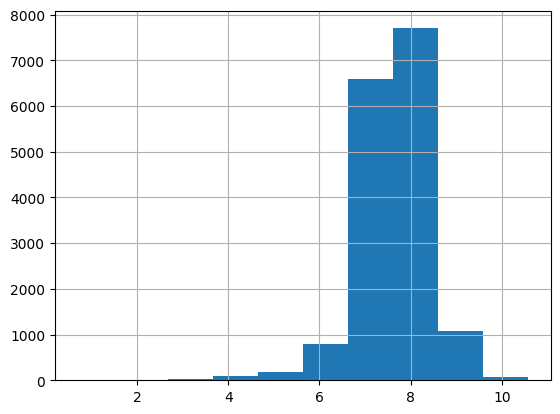

In [120]:
train_features_numeric["total_rooms"].apply(np.log).hist()       # این متقارن تره و توزیع نرمال داره 

In [121]:
from sklearn.metrics.pairwise import rbf_kernel

In [122]:
rbf_kernel(train_features_numeric[["housing_median_age"]] ,[[35]] ,gamma=0.1)

array([[7.44658307e-03],
       [4.57533877e-08],
       [1.00000000e+00],
       ...,
       [4.57533877e-08],
       [9.04837418e-01],
       [6.70320046e-01]], shape=(16512, 1))

In [123]:
train_features_numeric[["housing_median_age"]]

,housing_median_age
16415,42.0
1279,22.0
7741,35.0
4425,27.0
1283,46.0
...,...
1221,21.0
12640,34.0
5747,48.0
16224,36.0


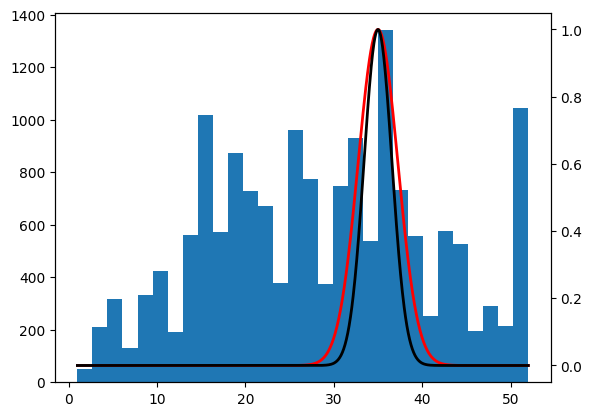

In [136]:
fig, ax = plt.subplots()
ax.hist(train_features_numeric["housing_median_age"], bins=30)

housing_ages=np.linspace(train_features_numeric["housing_median_age"].min(), 
                        train_features_numeric["housing_median_age"].max(), 
                       1000).reshape(-1,1)

rbf1=rbf_kernel(housing_ages, [[35]],gamma=0.1)
rbf2=rbf_kernel(housing_ages, [[35]],gamma=0.2)
ax2=ax.twinx()
ax2.plot(housing_ages, rbf1, color="red", lw=2)
ax2.plot(housing_ages, rbf2, color="black", lw=2)

In [139]:
from sklearn.linear_model import LinearRegression

In [140]:
train_target.to_frame()

,median_house_value
16415,158300.0
1279,253900.0
7741,209000.0
4425,137500.0
1283,93800.0
...,...
1221,104000.0
12640,75400.0
5747,354700.0
16224,84600.0


In [142]:
ss=StandardScaler()
traget_values=ss.fit_transform(train_target.to_frame())
traget_values

array([[-0.41979429],
       [ 0.41090161],
       [ 0.02075259],
       ...,
       [ 1.28678181],
       [-1.0601948 ],
       [ 1.12429213]], shape=(16512, 1))

In [145]:
model=LinearRegression()
model.fit(train_features_numeric[["median_income"]], traget_values)   #  حتما باید دو بعدی بدم وگرنه ارورو میده 

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [149]:
predictions=model.predict(train_features_numeric[["median_income"]].iloc[:5])

In [151]:
ss.inverse_transform(predictions)

array([[177436.32912486],
       [231100.4887263 ],
       [161400.49038824],
       [112429.4417594 ],
       [138397.98914116]])

In [152]:
#  یه روش آسون تر 

from sklearn.compose import TransformedTargetRegressor

In [153]:
model=TransformedTargetRegressor(LinearRegression(), transformer=StandardScaler() )
model.fit(train_features_numeric[["median_income"]],
         train_target.to_frame())

,regressor,LinearRegression()
,transformer,StandardScaler()
,func,None
,inverse_func,None
,check_inverse,True
,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False
,copy,True


In [154]:
model.predict(train_features_numeric[["median_income"]].iloc[:5])

array([[177436.32912486],
       [231100.4887263 ],
       [161400.49038824],
       [112429.4417594 ],
       [138397.98914116]])

In [155]:
from sklearn.preprocessing import FunctionTransformer

In [156]:
logarithmic_transformer=FunctionTransformer(np.log, inverse_func=np.exp)
logarithmic_transformer.transform(train_features_numeric[["population"]])

,population
16415,5.545177
1279,6.874198
7741,7.372746
4425,5.517453
1283,4.615121
...,...
1221,7.201171
12640,6.784457
5747,6.715383
16224,7.465083


In [161]:
rbf_transformer=FunctionTransformer(rbf_kernel,
                   kw_args={'Y':[[35]], "gamma":0.1})

In [162]:
rbf_transformer.transform(train_features_numeric[["housing_median_age"]])

array([[7.44658307e-03],
       [4.57533877e-08],
       [1.00000000e+00],
       ...,
       [4.57533877e-08],
       [9.04837418e-01],
       [6.70320046e-01]], shape=(16512, 1))